# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [1]:
import networkx as nx

from src.model import VRP, create_constraints, output_variables, create_example_2
from src.pricer import VRPPricer
from src.parse import parse

from matplotlib import pyplot as plt
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [2]:
# G = parse("Instances/E/E-n22-k4.vrp")
# G = parse("Instances/E/E-n23-k3.vrp")
# G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")
# G = parse("Instances/E/E-n101-k14.vrp")
# G = parse("Instances/Uchoa/X-n101-k25.vrp")
# G.graph['min_trucks'] = 26
# G = parse("Instances/Uchoa/X-n106-k14.vrp")
# G.graph['min_trucks'] = 14
# G = parse("Instances/Uchoa/X-n110-k13.vrp")
# G.graph['min_trucks'] = 13
# G = parse("Instances/Uchoa/X-n115-k10.vrp")
# G.graph['min_trucks'] = 10
G = parse("X-n120-k6",6)
# G = parse("Instances/Uchoa/X-n125-k30.vrp")
# G.graph['min_trucks'] = 30
# G = parse("Instances/Uchoa/X-n129-k18.vrp")
# G.graph['min_trucks'] = 18
# G = parse("Instances/Uchoa/X-n200-k36.vrp")
# G.graph['min_trucks'] = 36
# G = parse("Instances/Uchoa/X-n228-k23.vrp")
# G.graph['min_trucks'] = 23
# G = parse("Instances/Uchoa/X-n251-k28.vrp")
# G.graph['min_trucks'] = 28
# G = parse("Instances/Uchoa/X-n256-k16.vrp")
# G.graph['min_trucks'] = 16
# G = parse("Instances/Uchoa/X-n289-k60.vrp")
# G.graph['min_trucks'] = 61
# G = parse("Instances/Uchoa/X-n502-k39.vrp")
# G.graph['min_trucks'] = 39 #TODO: Ist dieses K auch das K, einer Optimallösung?

MAIN: Instance X-n120-k6
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 6


In [ ]:
model = VRP(G)

# Create pricer
pricer = VRPPricer(G)
pricer.data['methods'] = ["ng8","cyc2","SPPRC"]
pricer.data['max_vars']= 10000
pricer.data['time_limit'] = 120
pricer.data['farley'] = False

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,pricer,heuristic_stale_it=20, heuristic_max_it=2e4, heuristic_time=1e-2)

model.optimize()
model.hideOutput(quiet=False)

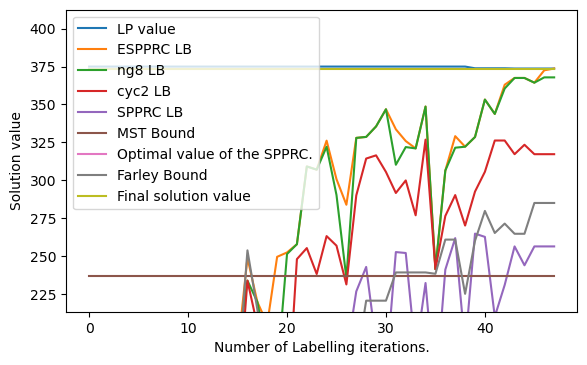

In [4]:
# This value is the exact pagewidth of latex
plt.figure(figsize=(6.6,4),dpi=100)

upper_bounds = [x for x,y in pricer.data['bounds'][pricer.data['methods'][0]]]
plt.plot(upper_bounds, label="LP value")

xmax = 0
for method in pricer.data['methods']:
    lower_bounds = [y for x,y in pricer.data['bounds'][method]]
    plt.plot(lower_bounds, label=f'{method} LB')
    xmax = max(upper_bounds[0],xmax)

T = nx.minimum_spanning_tree(G)
mst = T.size(weight='weight') + min(G.edges().data('weight'),key=lambda edge: edge[2])[2]
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

# optimal = [534 for i in range(len(upper_bounds))]
# plt.plot(optimal, label="Optimal Integer Solution")

spprc = [12308 for i in range(len(upper_bounds))]
plt.plot(spprc, label="Optimal value of the SPPRC.")

# ng8 = [481 for i in range(len(upper_bounds))]
# plt.plot(ng8, label="Optimal value of ng 8.")

# cyc2 = [464.2 for i in range(len(upper_bounds))]
# plt.plot(cyc2, label="Optimal value of 2-cycle Elimination.")

if pricer.data['farley']:
    farley_bounds = pricer.data['farley_bound']
    plt.plot(farley_bounds, label="Farley Bound")

solval = model.getObjVal()
sol = [solval for i in range(len(upper_bounds))]
plt.plot(sol,label="Final solution value")

plt.ylim((mst[0]*0.9,xmax*1.1))

plt.legend(loc='upper left')
plt.xlabel("Number of Labelling iterations.")
plt.ylabel("Solution value")
# plt.savefig("plots/E-n30-k3.espprc.pgf")
plt.show()

In [ ]:
output_variables(model, pricer)